# Differential Expression on GTEx dataset

### Set instance and token

In [1]:
suppressMessages(library(tidyverse))
library(integrationCurator) # Genestack client library

Sys.setenv(PRED_SPOT_HOST = 'occam.genestack.com',
           PRED_SPOT_TOKEN = '<token>',
           PRED_SPOT_VERSION = 'default-released')

### Get samples

In [2]:
study_filter = 'genestack:accession=GSF962829'
sample_filter = paste(sprintf('"GTEX original SMTS"="%s"',
                              c('Prostate', 'Breast', 'Salivary Gland')),collapse=" OR ")

start = Sys.time()
samples <- as_tibble(integrationCurator::OmicsQueriesApi_search_samples(
    study_filter=study_filter,
    sample_filter=sample_filter
)$content$data[['metadata']])
cat(sprintf('Time to get %s samples: %s seconds\n\n', nrow(samples), round(Sys.time()-start)))

head(samples)

Time to get 569 samples: 1 seconds



genestack:accession,Sample Source ID,Sample Name,Organism,Disease,Tissue,Cell Type,Cell Line,Sampling Site,Age,...,Specimen Collection Time Unit,Harvest Location,Specimen Type,Tissue or Cell Type,Donor Disease,Sample Source,Donor Treatment - Treatment Name,Sample Type,GTEX original SMTS,Specimen Treatment - Treatment Name
GSF968643,GTEX-15UF6-0126-SM-6PAMB,GTEX-15UF6-0126-SM-6PAMB,Homo sapiens,Healthy,breast,NA,NA,Right Breast,NA,...,hours,Right Breast,DNA or RNA Extraction from Paxgene-derived Lysate Plate Based,Mammary Tissue,Healthy,GTEX-15UF6-0126-SM-6PAMB,Unknown,RNA,Breast,Untreated
GSF972740,GTEX-RWSA-2026-SM-47JX8,GTEX-RWSA-2026-SM-47JX8,Homo sapiens,Healthy,prostate gland,NA,NA,Prostate,NA,...,hours,Prostate,RNA isolation_PAXgene Tissue miRNA,Prostate,Healthy,GTEX-RWSA-2026-SM-47JX8,Unknown,RNA,Prostate,Untreated
GSF974788,GTEX-XOT4-0726-SM-4GIAW,GTEX-XOT4-0726-SM-4GIAW,Homo sapiens,Healthy,breast,NA,NA,Right Breast,NA,...,hours,Right Breast,RNA isolation_PAXgene Tissue miRNA,Mammary Tissue,Healthy,GTEX-XOT4-0726-SM-4GIAW,Unknown,RNA,Breast,Untreated
GSF974781,GTEX-XMK1-2626-SM-4B65R,GTEX-XMK1-2626-SM-4B65R,Homo sapiens,Healthy,minor salivary gland,NA,NA,Inner surface of lower lip,NA,...,hours,Inner surface of lower lip,RNA isolation_PAXgene Tissue miRNA,Minor Salivary Gland,Healthy,GTEX-XMK1-2626-SM-4B65R,Unknown,RNA,Salivary Gland,Untreated
GSF975793,GTEX-ZDXO-0126-SM-5S2ND,GTEX-ZDXO-0126-SM-5S2ND,Homo sapiens,Healthy,breast,NA,NA,Right Breast,NA,...,hours,Right Breast,RNA Extraction from Paxgene-derived Lysate Plate Based,Mammary Tissue,Healthy,GTEX-ZDXO-0126-SM-5S2ND,Unknown,RNA,Breast,Untreated
GSF963508,GTEX-11O72-2126-SM-5N9FO,GTEX-11O72-2126-SM-5N9FO,Homo sapiens,Healthy,breast,NA,NA,Right Breast,NA,...,hours,Right Breast,RNA Extraction from Paxgene-derived Lysate Plate Based,Mammary Tissue,Healthy,GTEX-11O72-2126-SM-5N9FO,Unknown,RNA,Breast,Untreated


### Get expression data

In [3]:
gene = 'ENSG00000014257'
ex_query = sprintf('Gene=%s MinValue=0', gene)

start = Sys.time()
expressions = as_tibble(do.call(cbind, OmicsQueriesApi_search_expression_data(
    study_filter = study_filter,
    sample_filter = sample_filter,
    ex_query = ex_query
)$content$data))
cat(sprintf('Time to get %s expression values: %s seconds\n\n', 
    nrow(expressions), round(Sys.time()-start)))

head(expressions)

Time to get 539 expression values: 1 seconds



itemId,metadata.Experimental Platform,metadata.Source ID,metadata.Genome Version,metadata.Scale,metadata.Normalization Method,metadata.Transcriptomics Source,metadata.Run Source ID,runId,groupId,gene,expression,sample
GSF980564-ENSG00000014257,"Illumina TrueSeq.v1, HiSeq 2000 , HiSeq2500",GTEx V7,GRCh37,Unknown,TPM,GTEx,GTEX-1117F-2826-SM-5GZXL,GSF980564,GSF976981,ENSG00000014257,71,GSF962841
GSF984120-ENSG00000014257,"Illumina TrueSeq.v1, HiSeq 2000 , HiSeq2500",GTEx V7,GRCh37,Unknown,TPM,GTEx,GTEX-1117F-3026-SM-5GZYU,GSF984120,GSF976981,ENSG00000014257,399,GSF962843
GSF985759-ENSG00000014257,"Illumina TrueSeq.v1, HiSeq 2000 , HiSeq2500",GTEx V7,GRCh37,Unknown,TPM,GTEx,GTEX-111CU-1526-SM-5N9FS,GSF985759,GSF976981,ENSG00000014257,92804,GSF962860
GSF985760-ENSG00000014257,"Illumina TrueSeq.v1, HiSeq 2000 , HiSeq2500",GTEx V7,GRCh37,Unknown,TPM,GTEx,GTEX-111FC-2026-SM-5GZYO,GSF985760,GSF976981,ENSG00000014257,273103,GSF962879
GSF984121-ENSG00000014257,"Illumina TrueSeq.v1, HiSeq 2000 , HiSeq2500",GTEx V7,GRCh37,Unknown,TPM,GTEx,GTEX-111FC-2926-SM-5GZY7,GSF984121,GSF976981,ENSG00000014257,1038,GSF962881
GSF985761-ENSG00000014257,"Illumina TrueSeq.v1, HiSeq 2000 , HiSeq2500",GTEx V7,GRCh37,Unknown,TPM,GTEx,GTEX-111YS-1726-SM-5GIED,GSF985761,GSF976981,ENSG00000014257,29550,GSF962914


### Differential expression plot

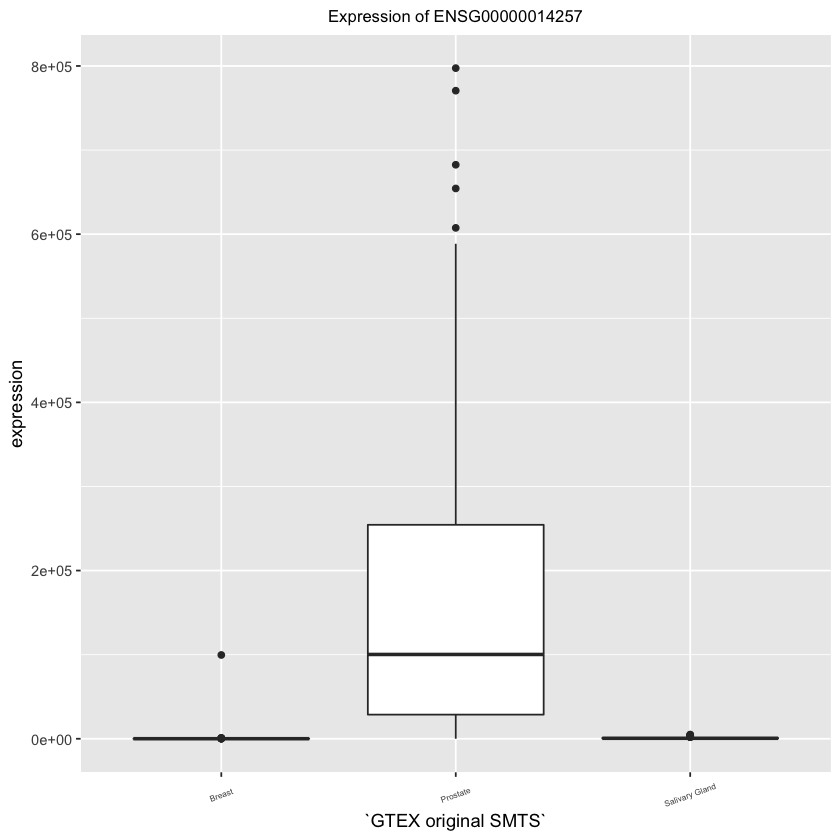

In [4]:
samples_expressions = inner_join(samples, expressions, by=c("genestack:accession"="sample"))
ggplot(samples_expressions, 
    mapping=aes(x=`GTEX original SMTS`, y=expression)) + 
    geom_boxplot() + ggtitle(sprintf('Expression of %s', gene)) +
    theme(axis.text.x = element_text(size = 5, angle = 20, hjust = 0.5, vjust = 0.5)) +
    theme(plot.title = element_text(hjust = 0.5, size=10))